In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../data/data.csv')

In [3]:
df.shape

(210240, 44)

In [4]:
df.head()

,Start Time,End Time,Vessel Name,Power Galley 1 (MW),Power Galley 2 (MW),Power Service (MW),HVAC Chiller 1 Power (MW),HVAC Chiller 2 Power (MW),HVAC Chiller 3 Power (MW),Scrubber Power (MW),Sea Temperature (Celsius),Boiler 1 Fuel Flow Rate (L/h),Boiler 2 Fuel Flow Rate (L/h),Incinerator 1 Fuel Flow Rate (L/h),Diesel Generator 1 Power (MW),Diesel Generator 2 Power (MW),Diesel Generator 3 Power (MW),Diesel Generator 4 Power (MW),Latitude (Degrees),Longitude (Degrees),Relative Wind Angle (Degrees),True Wind Angle (Degrees),Depth (m),Relative Wind Direction (Degrees),True Wind Direction (Degrees),Draft (m),Speed Over Ground (knots),True Wind Speed (knots),Relative Wind Speed (knots),Speed Through Water (knots),Local Time (h),Trim (m),Propulsion Power (MW),Port Side Propulsion Power (MW),Starboard Side Propulsion Power (MW),Bow Thruster 1 Power (MW),Bow Thruster 2 Power (MW),Bow Thruster 3 Power (MW),Stern Thruster 1 Power (MW),Stern Thruster 2 Power (MW),Main Engine 1 Fuel Flow Rate (kg/h),Main Engine 2 Fuel Flow Rate (kg/h),Main Engine 3 Fuel Flow Rate (kg/h),Main Engine 4 Fuel Flow Rate (kg/h)
0,2023-01-01T00:00:00,2023-01-01T00:05:00,Vessel 1,0.0946,0.1384,5.4654,0.5074,0.0,0.4979,0.4191,27.3000,0.0000,0.0,19.0090,0.0,0.0,0.0,7.3349,17.72523,-65.45738,8.4428,10.9049,NaN,64.3112,66.7735,7.8721,7.6300,19.5050,27.0579,7.8881,19.67367,-0.1425,1.8691,0.8854,0.9837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1645.82000
1,2023-01-01T00:05:00,2023-01-01T00:10:00,Vessel 1,0.0540,0.1370,5.4387,0.5158,0.0,0.4982,0.4204,27.3000,47.7695,0.0,216.3180,0.0,0.0,0.0,7.3011,17.73088,-65.44803,41.3100,78.7817,NaN,62.8161,64.3452,7.8713,7.5800,19.2968,26.8067,7.7438,19.75763,-0.1405,1.8622,0.8737,0.9885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1643.78999
2,2023-01-01T00:10:00,2023-01-01T00:15:00,Vessel 1,0.0439,0.1785,5.5265,0.5117,0.0,0.5032,0.4199,27.3000,77.2034,0.0,439.4300,0.0,0.0,0.0,7.3299,17.73655,-65.43887,23.9997,33.6216,NaN,80.7356,90.3574,7.8718,7.4379,19.4491,25.8380,7.6320,19.84158,-0.1450,1.8036,0.8441,0.9595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1642.07000
3,2023-01-01T00:15:00,2023-01-01T00:20:00,Vessel 1,0.0733,0.1725,5.5257,0.5177,0.0,0.5103,0.4188,27.3076,60.6369,0.0,218.2797,0.0,0.0,0.0,7.3712,17.74202,-65.42980,14.5540,20.0348,NaN,75.9723,81.4529,7.8710,7.3979,20.6231,27.6498,7.5080,19.92551,-0.1308,1.8457,0.8543,0.9914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1650.71000
4,2023-01-01T00:20:00,2023-01-01T00:25:00,Vessel 1,0.0780,0.1397,5.4634,0.5169,0.0,0.5100,0.4203,27.3518,55.2184,0.0,0.0000,0.0,0.0,0.0,7.3032,17.74713,-65.42042,14.5632,20.0328,NaN,74.6509,80.1204,7.8707,7.4343,20.4554,27.5341,7.5521,20.00947,-0.1269,1.8399,0.8467,0.9932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1644.54000


In [5]:
len(df.dtypes[df.dtypes=='float64'])

41

In [6]:
df = df[df['Vessel Name']=='Vessel 1']

In [7]:
df.shape

(105120, 44)

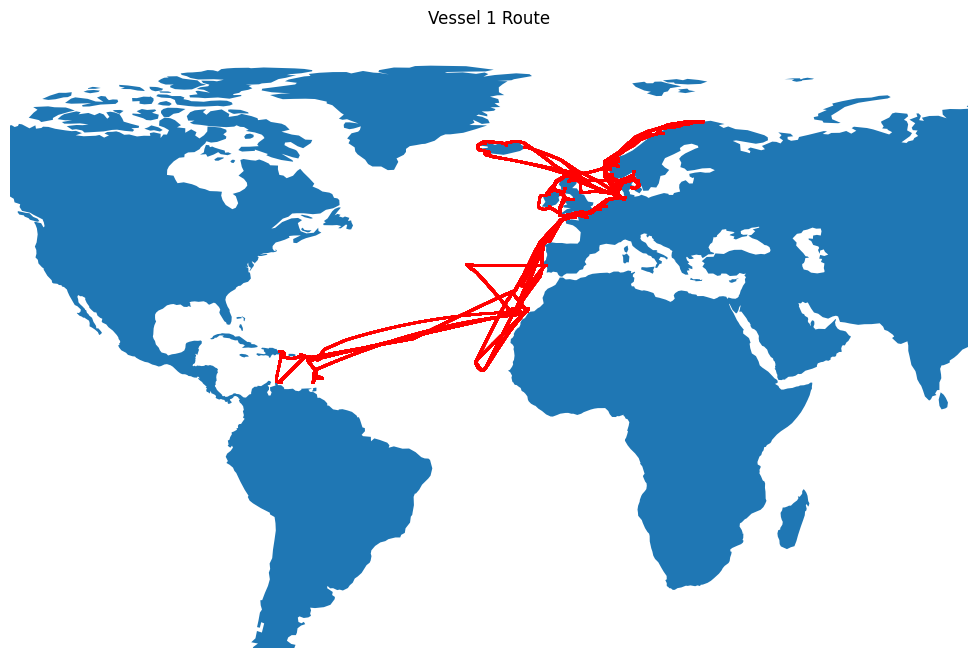

In [8]:
geometry = [Point(xy) for xy in zip(df['Longitude (Degrees)'], df['Latitude (Degrees)'])]
gdf = GeoDataFrame(df, geometry=geometry)

world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
ax = gdf.plot(ax=world.plot(figsize=(16, 8)), marker='o', color='red', markersize=1)
padding = 60
minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx-padding, maxx+padding)
ax.set_ylim(miny-padding, maxy+20)
plt.title('Vessel 1 Route')
plt.axis('off')
plt.show()

In [9]:
for col in ['Vessel Name', 'Bow Thruster 1 Power (MW)']:
    print(df[col].unique())

['Vessel 1']
[ 0. nan]


In [10]:
df['Depth (m)'].isna().sum()

np.int64(27756)

In [11]:
df['Depth (m)'].isna().sum()/len(df)

np.float64(0.26404109589041097)

In [12]:
(df['Port Side Propulsion Power (MW)'] + df['Starboard Side Propulsion Power (MW)']).describe()

count    105119.000000
mean          7.655667
std           7.025931
min          -0.008900
25%           0.040000
50%           6.178900
75%          12.953850
max          27.943600
dtype: float64

In [13]:
df['Propulsion Power (MW)'].describe()

count    105119.000000
mean          7.655666
std           7.025931
min          -0.008900
25%           0.040000
50%           6.179000
75%          12.953850
max          27.943600
Name: Propulsion Power (MW), dtype: float64

In [14]:
df.drop(['Vessel Name', 'Bow Thruster 1 Power (MW)', 'Depth (m)', 'Start Time', 'End Time', 'Longitude (Degrees)', 'Latitude (Degrees)', 'Local Time (h)', 'Port Side Propulsion Power (MW)', 'Starboard Side Propulsion Power (MW)'], axis=1, inplace=True)

In [15]:
df.isna().sum().sum()

np.int64(541)

In [16]:
df.isna().sum()[df.isna().sum()>0]

Power Galley 1 (MW)                      1
Power Galley 2 (MW)                      1
Power Service (MW)                       1
HVAC Chiller 1 Power (MW)                1
HVAC Chiller 2 Power (MW)                1
HVAC Chiller 3 Power (MW)                1
Scrubber Power (MW)                      1
Sea Temperature (Celsius)                1
Boiler 1 Fuel Flow Rate (L/h)            1
Boiler 2 Fuel Flow Rate (L/h)            1
Incinerator 1 Fuel Flow Rate (L/h)       1
Diesel Generator 1 Power (MW)            1
Diesel Generator 2 Power (MW)            1
Diesel Generator 3 Power (MW)            1
Diesel Generator 4 Power (MW)            1
True Wind Angle (Degrees)               42
Relative Wind Direction (Degrees)       41
True Wind Direction (Degrees)           42
Draft (m)                              171
True Wind Speed (knots)                 42
Speed Through Water (knots)             41
Trim (m)                               138
Propulsion Power (MW)                    1
Bow Thruste

In [17]:
i = df[df['Power Galley 1 (MW)'].isna()].index[0]
df.iloc[i] = df.iloc[i].fillna((df.iloc[i-1] + df.iloc[i+1])/2)

In [18]:
df.shape

(105120, 34)

In [19]:
df.isna().sum()[df.isna().sum()>0]

True Wind Angle (Degrees)             42
Relative Wind Direction (Degrees)     41
True Wind Direction (Degrees)         42
Draft (m)                            171
True Wind Speed (knots)               42
Speed Through Water (knots)           41
Trim (m)                             138
dtype: int64

In [20]:
df.fillna(method='bfill', inplace=True)

C:\Users\sanat\AppData\Local\Temp\ipykernel_3956\3314729575.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [21]:
df.isna().any().any()

np.False_

In [22]:
df.head()

,Power Galley 1 (MW),Power Galley 2 (MW),Power Service (MW),HVAC Chiller 1 Power (MW),HVAC Chiller 2 Power (MW),HVAC Chiller 3 Power (MW),Scrubber Power (MW),Sea Temperature (Celsius),Boiler 1 Fuel Flow Rate (L/h),Boiler 2 Fuel Flow Rate (L/h),Incinerator 1 Fuel Flow Rate (L/h),Diesel Generator 1 Power (MW),Diesel Generator 2 Power (MW),Diesel Generator 3 Power (MW),Diesel Generator 4 Power (MW),Relative Wind Angle (Degrees),True Wind Angle (Degrees),Relative Wind Direction (Degrees),True Wind Direction (Degrees),Draft (m),Speed Over Ground (knots),True Wind Speed (knots),Relative Wind Speed (knots),Speed Through Water (knots),Trim (m),Propulsion Power (MW),Bow Thruster 2 Power (MW),Bow Thruster 3 Power (MW),Stern Thruster 1 Power (MW),Stern Thruster 2 Power (MW),Main Engine 1 Fuel Flow Rate (kg/h),Main Engine 2 Fuel Flow Rate (kg/h),Main Engine 3 Fuel Flow Rate (kg/h),Main Engine 4 Fuel Flow Rate (kg/h)
0,0.0946,0.1384,5.4654,0.5074,0.0,0.4979,0.4191,27.3000,0.0000,0.0,19.0090,0.0,0.0,0.0,7.3349,8.4428,10.9049,64.3112,66.7735,7.8721,7.6300,19.5050,27.0579,7.8881,-0.1425,1.8691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1645.82000
1,0.0540,0.1370,5.4387,0.5158,0.0,0.4982,0.4204,27.3000,47.7695,0.0,216.3180,0.0,0.0,0.0,7.3011,41.3100,78.7817,62.8161,64.3452,7.8713,7.5800,19.2968,26.8067,7.7438,-0.1405,1.8622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1643.78999
2,0.0439,0.1785,5.5265,0.5117,0.0,0.5032,0.4199,27.3000,77.2034,0.0,439.4300,0.0,0.0,0.0,7.3299,23.9997,33.6216,80.7356,90.3574,7.8718,7.4379,19.4491,25.8380,7.6320,-0.1450,1.8036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1642.07000
3,0.0733,0.1725,5.5257,0.5177,0.0,0.5103,0.4188,27.3076,60.6369,0.0,218.2797,0.0,0.0,0.0,7.3712,14.5540,20.0348,75.9723,81.4529,7.8710,7.3979,20.6231,27.6498,7.5080,-0.1308,1.8457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1650.71000
4,0.0780,0.1397,5.4634,0.5169,0.0,0.5100,0.4203,27.3518,55.2184,0.0,0.0000,0.0,0.0,0.0,7.3032,14.5632,20.0328,74.6509,80.1204,7.8707,7.4343,20.4554,27.5341,7.5521,-0.1269,1.8399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1644.54000


In [23]:
df[['Speed Through Water (knots)', 'Speed Over Ground (knots)']].corr()

,Speed Through Water (knots),Speed Over Ground (knots)
Speed Through Water (knots),1.000000,0.995127
Speed Over Ground (knots),0.995127,1.000000


In [24]:
df[['Relative Wind Angle (Degrees)', 'True Wind Angle (Degrees)']].corr()

,Relative Wind Angle (Degrees),True Wind Angle (Degrees)
Relative Wind Angle (Degrees),1.000000,0.941194
True Wind Angle (Degrees),0.941194,1.000000


In [25]:
df[['Relative Wind Speed (knots)', 'True Wind Speed (knots)']].corr()

,Relative Wind Speed (knots),True Wind Speed (knots)
Relative Wind Speed (knots),1.000000,0.774249
True Wind Speed (knots),0.774249,1.000000


In [26]:
df[['Relative Wind Direction (Degrees)', 'True Wind Direction (Degrees)']].corr()

,Relative Wind Direction (Degrees),True Wind Direction (Degrees)
Relative Wind Direction (Degrees),1.000000,0.666905
True Wind Direction (Degrees),0.666905,1.000000


In [27]:
df_new = pd.DataFrame()

df_new['Power Galley (MW)'] = df['Power Galley 1 (MW)'] + df['Power Galley 2 (MW)']
df_new['Power Service (MW)'] = df['Power Service (MW)']
df_new['HVAC Chiller Power (MW)'] = df['HVAC Chiller 1 Power (MW)'] + df['HVAC Chiller 2 Power (MW)'] + df['HVAC Chiller 3 Power (MW)']
df_new['Scrubber Power (MW)'] = df['Scrubber Power (MW)']
df_new['Sea Temperature (Celsius)'] = df['Sea Temperature (Celsius)']
df_new['Boiler Fuel Flow Rate (L/h)'] = df['Boiler 1 Fuel Flow Rate (L/h)'] + df['Boiler 2 Fuel Flow Rate (L/h)']
df_new['Incinerator 1 Fuel Flow Rate (L/h)'] = df['Incinerator 1 Fuel Flow Rate (L/h)']
df_new['Diesel Generator Power (MW)'] = df['Diesel Generator 1 Power (MW)'] + df['Diesel Generator 2 Power (MW)'] + df['Diesel Generator 3 Power (MW)'] + df['Diesel Generator 4 Power (MW)']
df_new['Relative Wind Angle (Degrees)'] = df['Relative Wind Angle (Degrees)']
df_new['Relative Wind Direction (Degrees)'] = df['Relative Wind Direction (Degrees)']
df_new['Draft (m)'] = df['Draft (m)']
df_new['Relative Wind Speed (knots)'] = df['Relative Wind Speed (knots)']
df_new['Speed Through Water (knots)'] = df['Speed Through Water (knots)']
df_new['Trim (m)'] = df['Trim (m)']
df_new['Propulsion Power (MW)'] = df['Propulsion Power (MW)']
df_new['Bow Thruster Power (MW)'] = df['Bow Thruster 2 Power (MW)'] + df['Bow Thruster 3 Power (MW)']
df_new['Stern Thruster Power (MW)'] = df['Stern Thruster 1 Power (MW)'] + df['Stern Thruster 2 Power (MW)']
df_new['Main Engine Fuel Flow Rate (kg/h)'] = df['Main Engine 1 Fuel Flow Rate (kg/h)'] + df['Main Engine 2 Fuel Flow Rate (kg/h)']

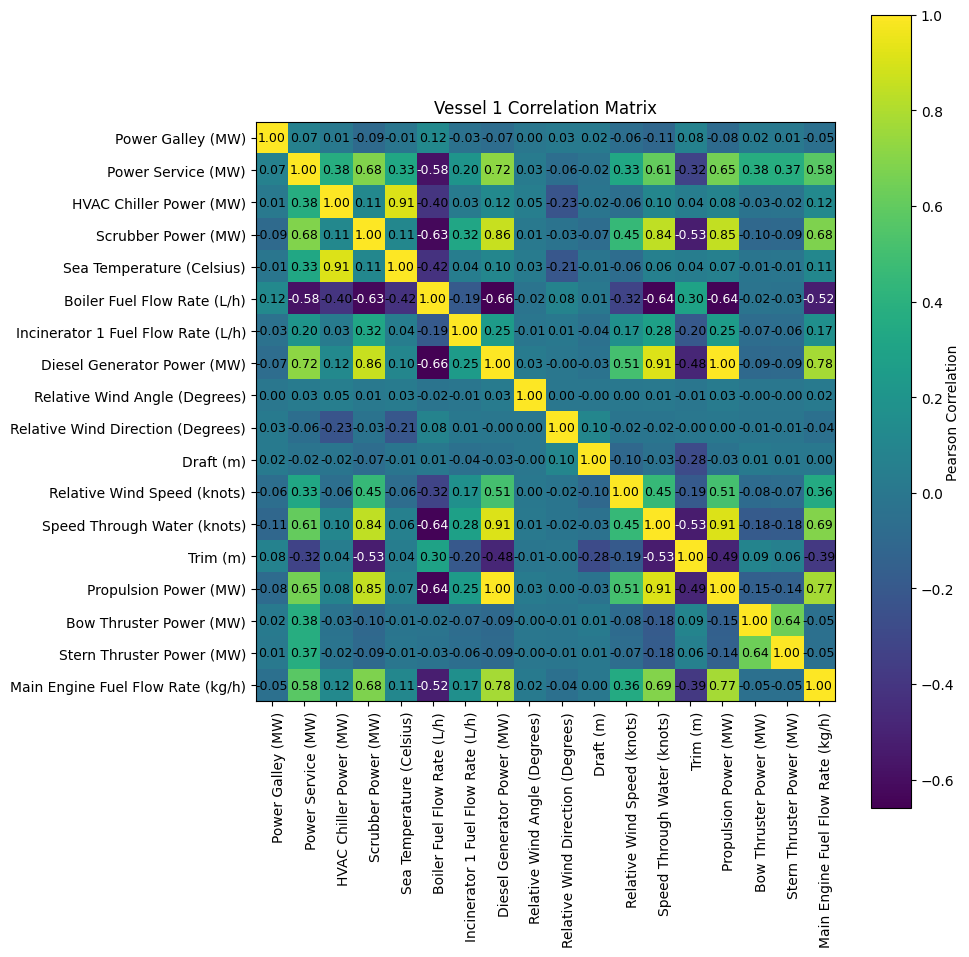

In [28]:
corr = df_new.corr()
corr_col = df_new.columns
col_size = len(df_new.columns)

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(corr)

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Pearson Correlation", rotation=90, va="bottom")

ax.set_xticks(np.arange(col_size), labels=corr_col)
ax.set_yticks(np.arange(col_size), labels=corr_col)

plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

for i, ix in enumerate(corr_col):
    for j, jx in enumerate(corr_col):
        corr_val = corr.loc[ix, jx]
        if corr_val<-0.5: text_color = "w"
        else: text_color = "black"
        text = ax.text(j, i, '{0:.2f}'.format(corr_val), ha="center", va="center", color=text_color, fontsize=9)

ax.set_title("Vessel 1 Correlation Matrix")
fig.tight_layout()
plt.show()

In [29]:
df_sample = df[['Diesel Generator 1 Power (MW)', 'Diesel Generator 2 Power (MW)', 'Diesel Generator 3 Power (MW)', 'Diesel Generator 4 Power (MW)', 'Main Engine 1 Fuel Flow Rate (kg/h)', 'Main Engine 2 Fuel Flow Rate (kg/h)', 'Main Engine 3 Fuel Flow Rate (kg/h)', 'Main Engine 4 Fuel Flow Rate (kg/h)']]
corr_sample = df_sample.corr()

corr_list_sample = corr_sample.unstack()
corr_list_sample = corr_list_sample[corr_list_sample!=1]
corr_list_sample.sort_values(ascending=False, inplace=True)
corr_list_sample = corr_list_sample.iloc[[i for i in range(0, len(corr_list_sample), 2)]]
corr_list_sample[:4]

Diesel Generator 1 Power (MW)        Main Engine 1 Fuel Flow Rate (kg/h)    0.999219
Main Engine 2 Fuel Flow Rate (kg/h)  Diesel Generator 2 Power (MW)          0.998504
Main Engine 4 Fuel Flow Rate (kg/h)  Diesel Generator 4 Power (MW)          0.997194
Diesel Generator 3 Power (MW)        Main Engine 3 Fuel Flow Rate (kg/h)    0.992567
dtype: float64